# Data Exploration
Data exploration is a crucial step in the data analysis process. It involves examining the dataset to understand its structure, contents, and relationships. This step helps in identifying patterns, detecting anomalies, and forming hypotheses for further analysis. Key activities in data exploration include:

- **Descriptive Statistics**: Summarizing the main features of the dataset using measures such as mean, median, mode, standard deviation, and variance.
- **Data Visualization**: Creating visual representations of the data, such as histograms, scatter plots, and box plots, to identify trends and patterns.
- **Missing Data Analysis**: Identifying and handling missing values in the dataset.
- **Correlation Analysis**: Examining the relationships between different variables in the dataset.

By thoroughly exploring the data, we can gain valuable insights and make informed decisions for subsequent data processing and modeling steps.

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
# Add the project root directory to the Python path
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))
# Load the data
data_path = project_root / 'data' / 'raw'
data_train = pd.read_csv(data_path / 'train.csv')
data_test = pd.read_csv(data_path / 'test.csv')
data_train_targets = pd.read_csv(data_path / 'train_targets.csv')

In [3]:
# Explore the data
print("--- Training data shape: ", data_train.shape)
print(data_train.head())

--- Training data shape:  (742, 19921)
  Unnamed: 0      A1BG       A1CF       A2M     A2ML1   A3GALT2     A4GALT  \
0        CL1  1.672481  45.412546  9.377504  0.860362  0.156075   0.358733   
1        CL2  0.545643  15.886006  0.126553  0.731387  0.000000   3.006263   
2        CL3  1.652956   0.464895  0.353668  0.196430  0.000000  11.393572   
3        CL4  0.795200   0.182806  0.534622  0.239157  0.027417  20.203002   
4        CL5  9.983922   0.222700  0.451019  0.152793  0.233698   1.174855   

      A4GNT       AAAS        AACS  ...       ZW10      ZWILCH       ZWINT  \
0  0.013006  90.484463  119.760414  ...  38.069286  118.897181  201.401740   
1  0.015819  43.455131   37.971081  ...  40.892433   72.780020   95.990439   
2  0.408079  86.349518   35.893872  ...  14.024315   33.830939   59.865191   
3  0.342707  74.806003   56.297983  ...  18.122326   56.826586  120.221485   
4  0.068735  53.228255   36.978543  ...  47.234577   63.179324   89.121585   

        ZXDA       ZXDB

In [4]:
print("--- Training targets shape: ", data_train_targets.shape)
print(data_train_targets.head())

--- Training targets shape:  (742, 3)
  sample       AAC                 tissue
0    CL1  0.050705               Prostate
1    CL2  0.163113      Esophagus/Stomach
2    CL3  0.236655  Bladder/Urinary Tract
3    CL4  0.270218  Bladder/Urinary Tract
4    CL5  0.071619              CNS/Brain


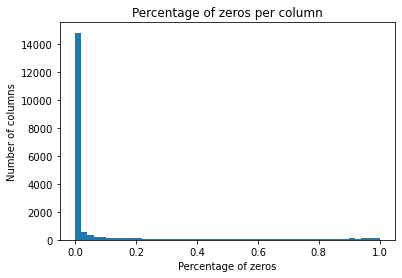

AC003002.1    0.907008
AC005697.1    0.915094
AC005837.2    0.924528
AC007375.2    0.924528
AC008878.2    0.932615
                ...   
VN1R4         0.977089
WFDC9         0.932615
Z82190.2      0.927224
ZCCHC13       0.975741
ZNF705B       0.912399
Length: 508, dtype: float64


In [5]:
# Plot percentage of samples == 0  per columns
percentage_zeros = (data_train == 0).mean()
percentage_zeros.plot(kind='hist', bins=50)
plt.xlabel('Percentage of zeros')
plt.ylabel('Number of columns')
plt.title('Percentage of zeros per column')
plt.show()
# Print all columns with more than 90% zeros
print(percentage_zeros[percentage_zeros > 0.9])

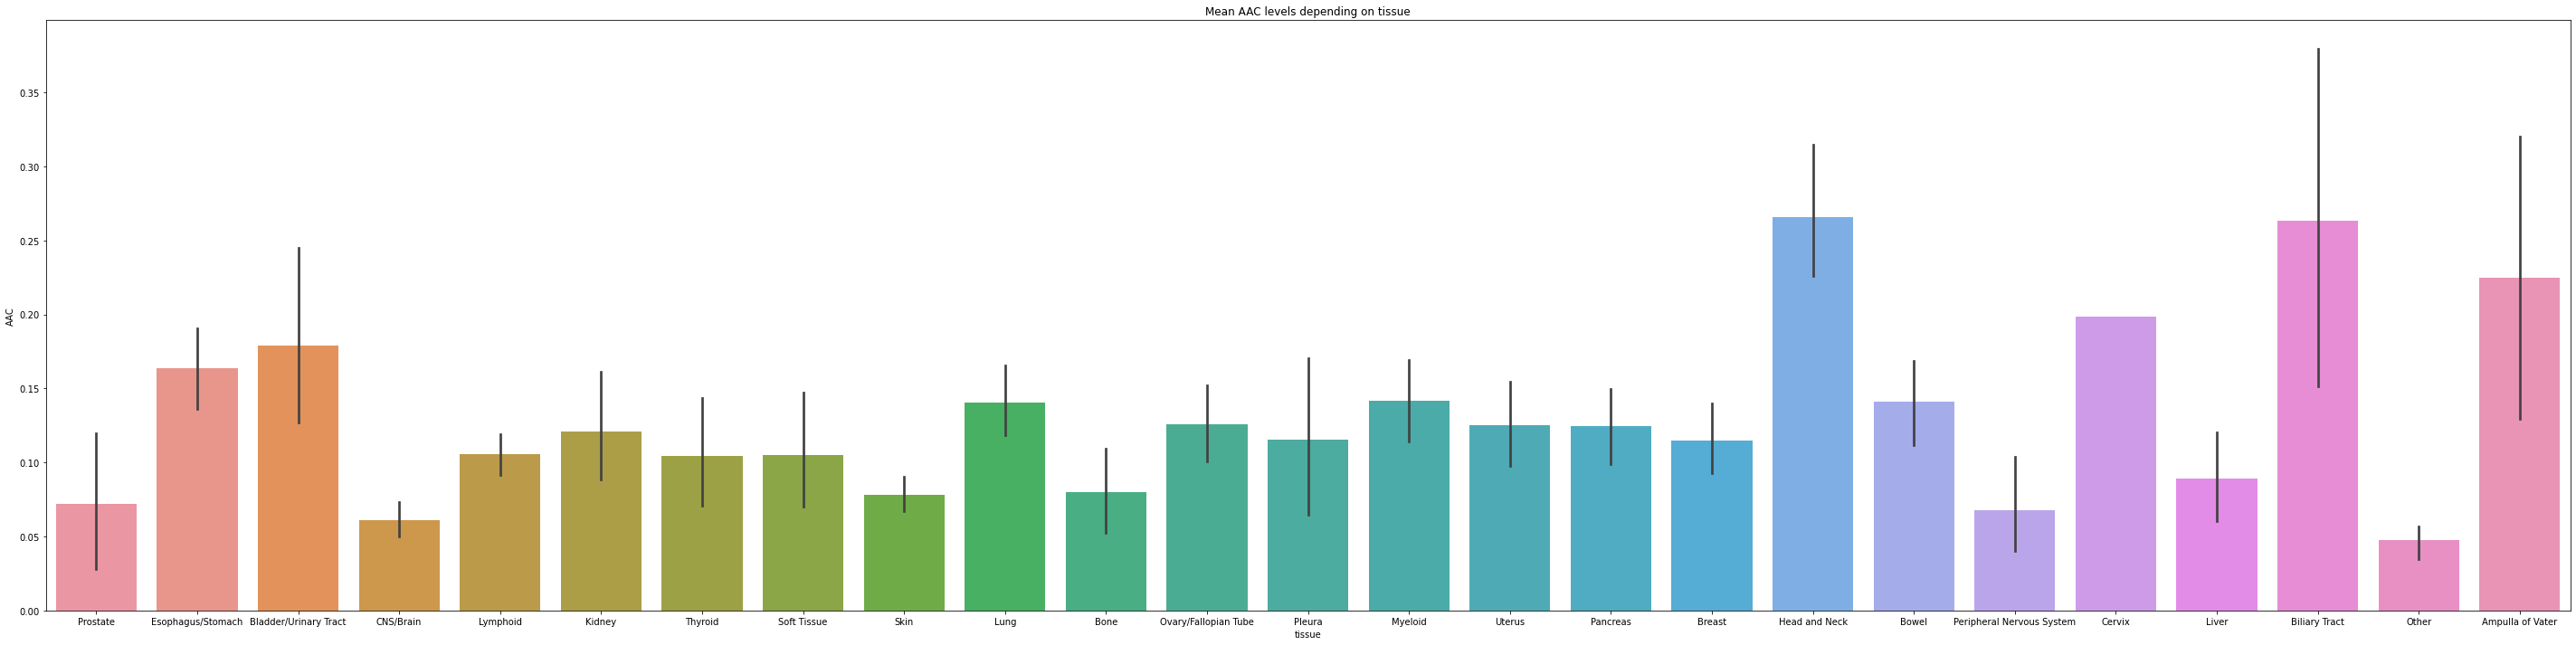

In [6]:
# plot the mean AAC levels depending on tissue
plt.figure(figsize=(50, 12))
sns.barplot(x="tissue", y="AAC", data=data_train_targets)
plt.title("Mean AAC levels depending on tissue")
plt.show()

In [7]:
print("--- Test data shape: ", data_test.shape)
print(data_test.head())

--- Test data shape:  (304, 19921)
  Unnamed: 0      A1BG       A1CF       A2M     A2ML1   A3GALT2     A4GALT  \
0        CL1  1.446057  75.700445  0.031116  0.471972  0.014860   3.129831   
1        CL2  7.201269   0.354029  0.074407  0.453273  0.108228  11.557571   
2        CL3  6.835308   0.121081  0.000000  0.211975  0.020079  12.372666   
3        CL4  6.384288   0.132942  0.018201  0.207608  0.007283   4.364313   
4        CL5  4.538481   1.354367  0.007254  0.237628  0.021695   3.881963   

      A4GNT       AAAS        AACS  ...       ZW10     ZWILCH      ZWINT  \
0  0.000000  54.031837  130.140472  ...  27.105080  39.252909  27.238822   
1  0.344976  43.575264   45.155525  ...  24.459509  20.147702   4.051783   
2  0.066928  34.581955   37.123022  ...  14.771119  27.387161  21.477355   
3  0.203914  49.908053   36.949086  ...  26.690940  18.067079  27.841600   
4  0.267576  39.319195   55.127152  ...  33.244498  49.214787  61.607545   

       ZXDA       ZXDB        ZXDC     

In [8]:
# Check for nan values
print("--- Training data nan values: ", data_train.isna().sum().sum())
print("--- Training targets nan values: ", data_train_targets.isna().sum().sum())
print("--- Test data nan values: ", data_test.isna().sum().sum())

--- Training data nan values:  0
--- Training targets nan values:  0
--- Test data nan values:  0


In [9]:
# Check for empty columns
print("--- Training data empty columns: ", data_train.columns[data_train.isna().all()].tolist())
print("--- Test data empty columns: ", data_test.columns[data_test.isna().all()].tolist())

--- Training data empty columns:  []
--- Test data empty columns:  []


In [10]:


# Vérifier si les données sont standardisées (moyenne = 0, écart-type = 1) pour chaque caractéristique
print("--- Training data mean: ", data_train.mean().mean())
print("--- Training data std: ", data_train.std().mean())

--- Training data mean:  47.94410686383452
--- Training data std:  40.55464823618729


/var/folders/gq/01wd3qp173d43h5n7q75rykc0000gn/T/ipykernel_67784/331117980.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("--- Training data mean: ", data_train.mean().mean())
/var/folders/gq/01wd3qp173d43h5n7q75rykc0000gn/T/ipykernel_67784/331117980.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("--- Training data std: ", data_train.std().mean())


# What is AAC (Area Above the Curve)?

**AAC (Area Above the Curve)** is a metric used in pharmacology to measure the effectiveness of a drug on cancer cell lines or tumor models. It represents the area above the dose-response curve, indicating how a specific cell line responds to a given drug over a range of concentrations.

In drug testing, various concentrations of a drug (like Erlotinib, in this case) are applied to cancer cell lines, and the response is measured. AAC captures the drug's ability to inhibit cell growth:

- **Higher AAC values**: These suggest a stronger response, meaning the drug is more effective in inhibiting cell growth at lower concentrations.
- **Lower AAC values**: These imply a weaker response, indicating that higher drug concentrations are needed to achieve cell inhibition.


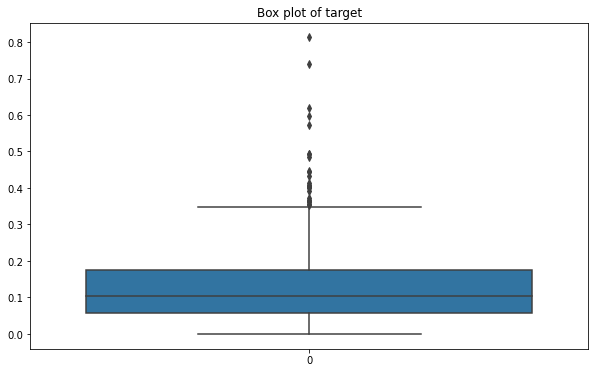

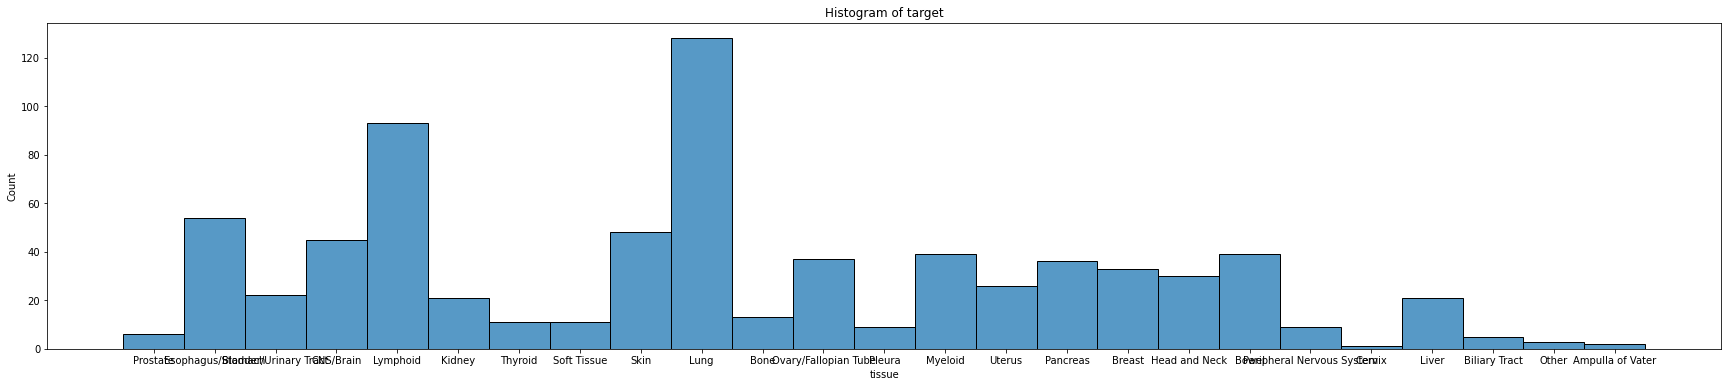

In [11]:
# Plot first column of target as box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_train_targets.iloc[:, 1])
plt.title('Box plot of target')
plt.show()
# Plot second column as histogram
plt.figure(figsize=(30, 6))
sns.histplot(data_train_targets.iloc[:, 2], bins=30)
plt.title('Histogram of target')
plt.show()

# Correlation

In [4]:
from src.utils.utils import load_data

# Use the function
data_train_proc, data_test_proc, data_train_targets_proc = load_data(raw = False)


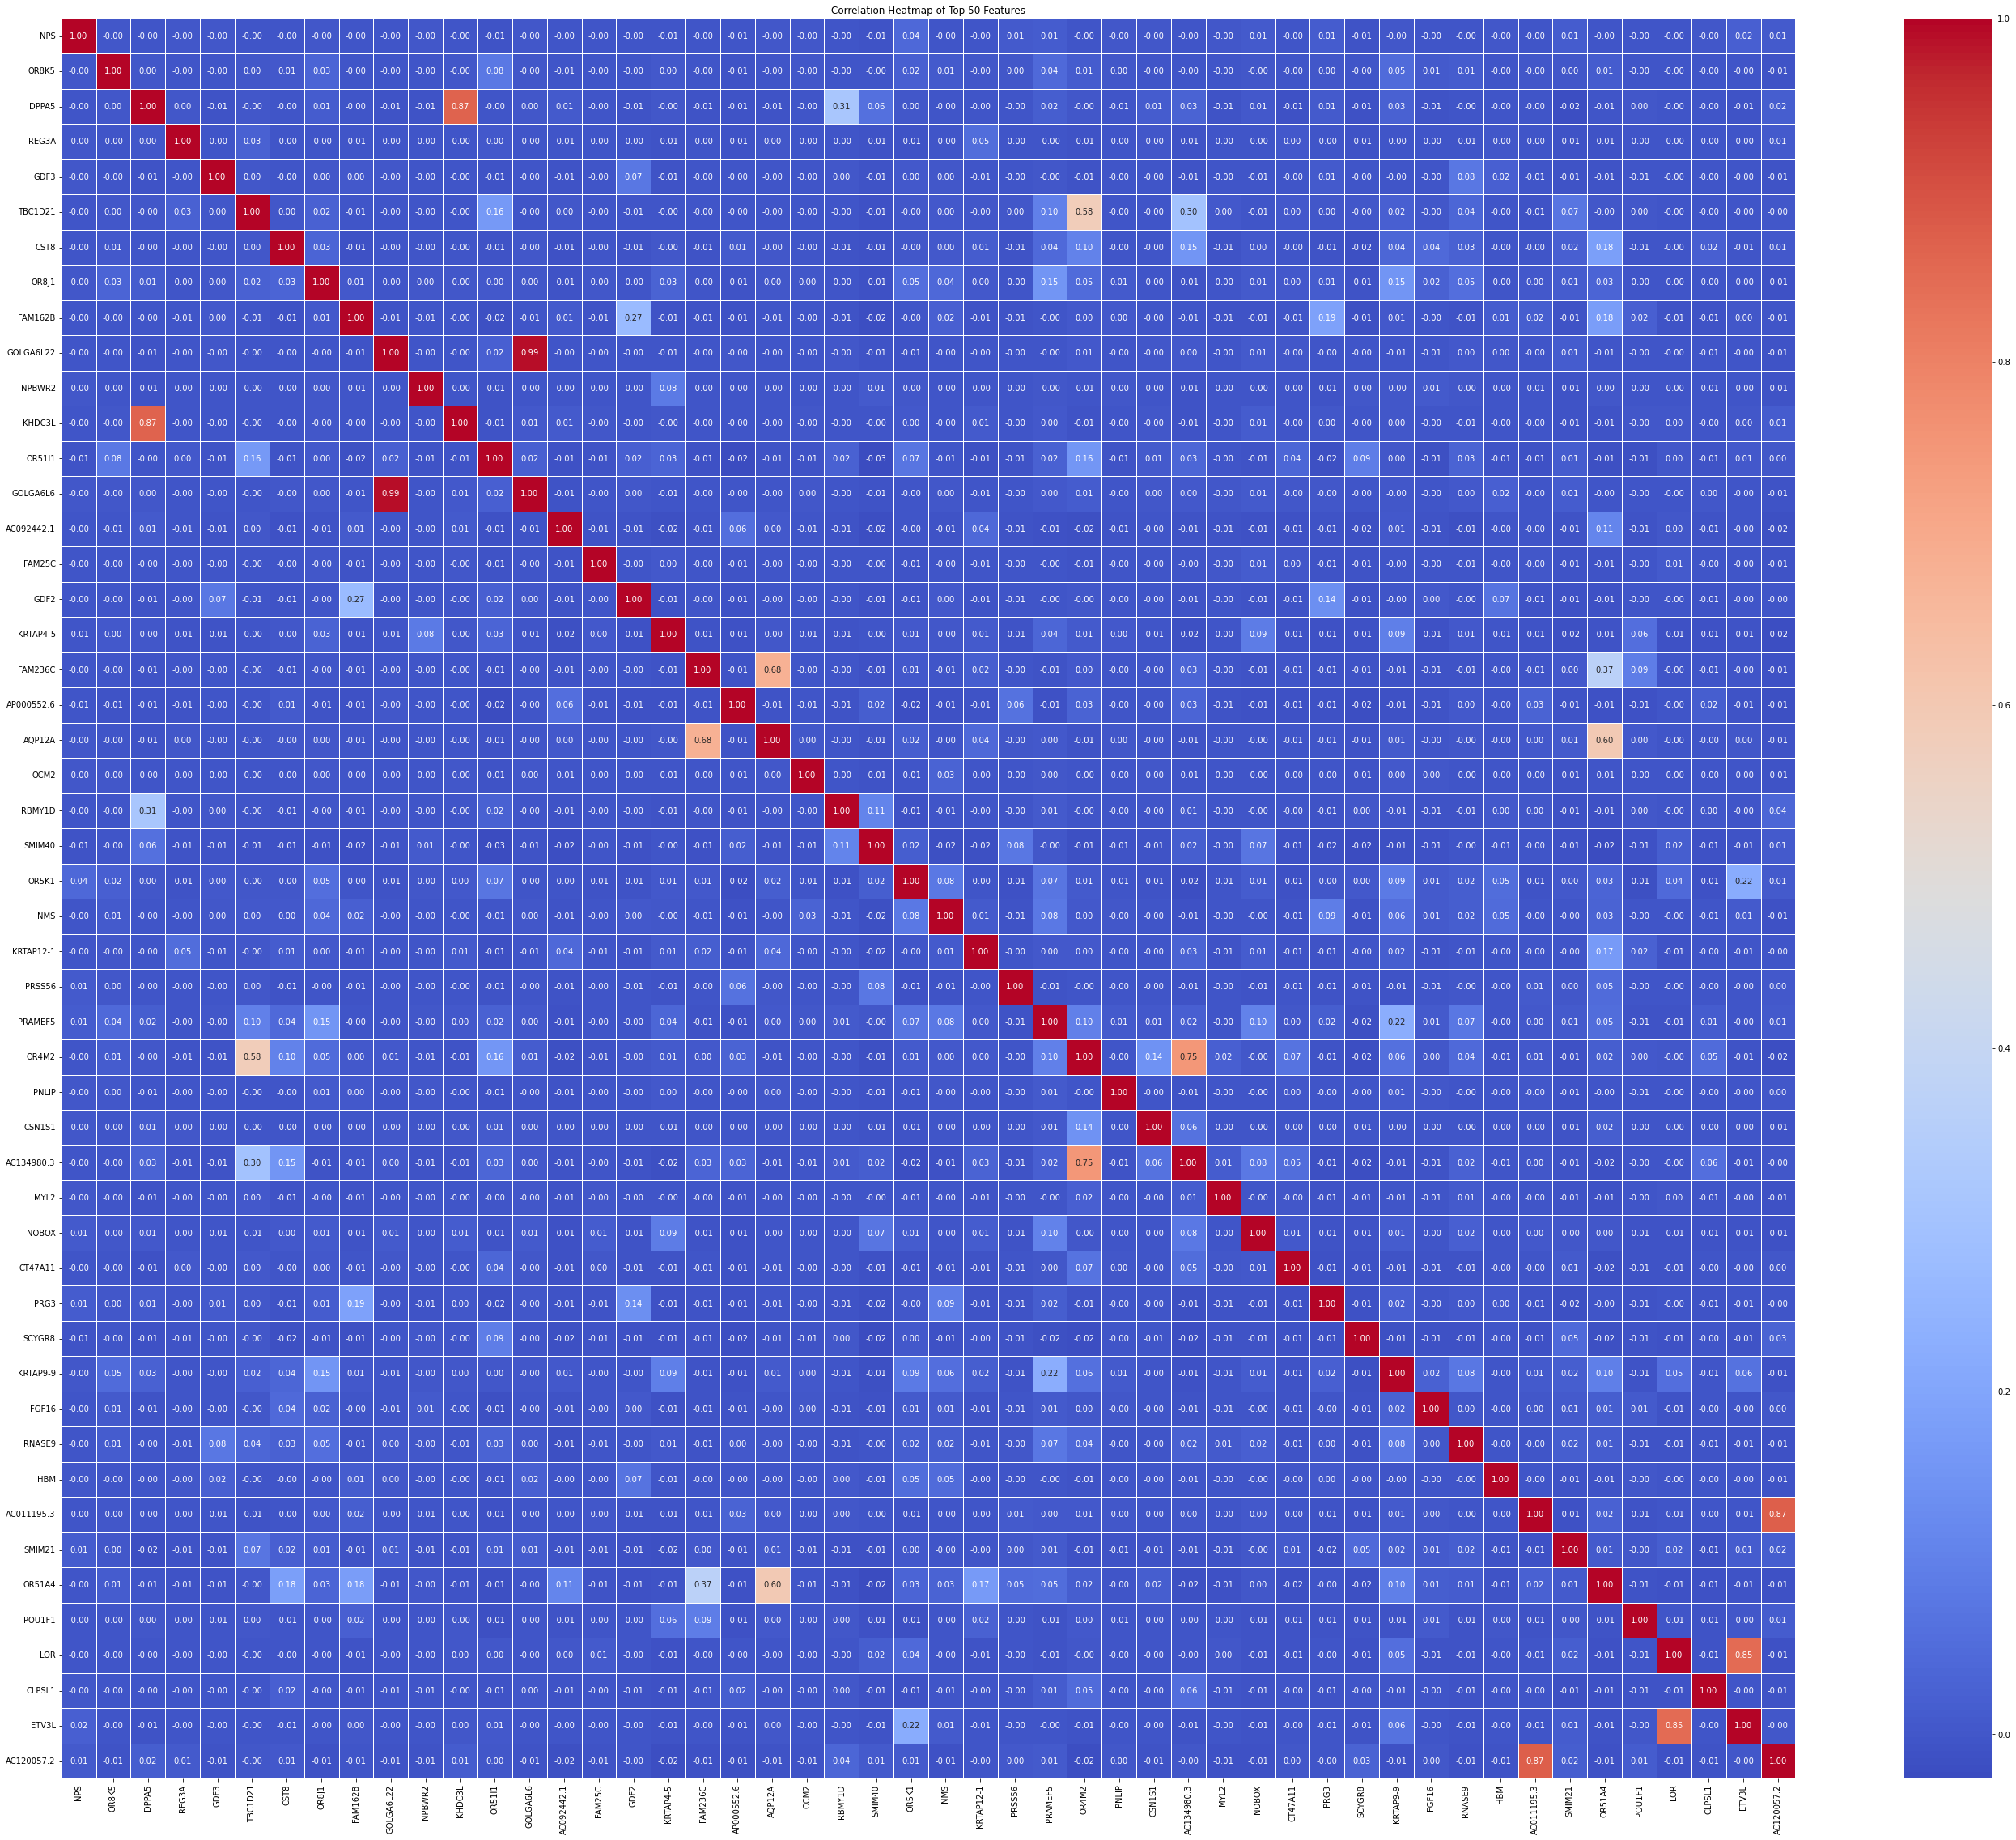

In [13]:
# Select the top 50 features based on variance
top_features = data_train_proc.var().sort_values(ascending=False).head(50).index
truncated_data = data_train_proc[top_features]

# Compute the correlation matrix for the selected features
corr_matrix = truncated_data.corr()

# Plot the heatmap
plt.figure(figsize=(48, 40))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Top 50 Features")
plt.show()

In [14]:
# Vérifier si les données sont standardisées (moyenne = 0, écart-type = 1) pour chaque caractéristique
print("--- Training data mean: ", data_train_proc.mean().mean())
print("--- Training data std: ", data_train_proc.std().mean())
# Check for nan values
print("--- Training data nan values: ", data_train_proc.isna().sum().sum())
print("--- Training targets nan values: ", data_train_targets_proc.isna().sum().sum())
print("--- Test data nan values: ", data_test_proc.isna().sum().sum())

--- Training data mean:  1.0829318802769346e-17
--- Training data std:  1.0
--- Training data nan values:  0
--- Training targets nan values:  0
--- Test data nan values:  0


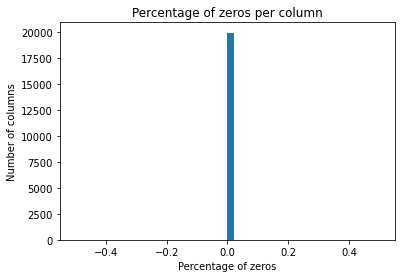

Series([], dtype: float64)


In [15]:
# Plot percentage of samples == 0  per columns
percentage_zeros = (data_train_proc == 0).mean()
percentage_zeros.plot(kind='hist', bins=50)
plt.xlabel('Percentage of zeros')
plt.ylabel('Number of columns')
plt.title('Percentage of zeros per column')
plt.show()
# Print all columns with more than 90% zeros
print(percentage_zeros[percentage_zeros > 0.9])

# PCA Analysis

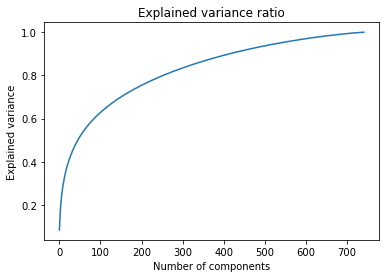

In [5]:
# Create a PCA object
pca = PCA()
pca.fit(data_train_proc)
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance ratio')
plt.show()


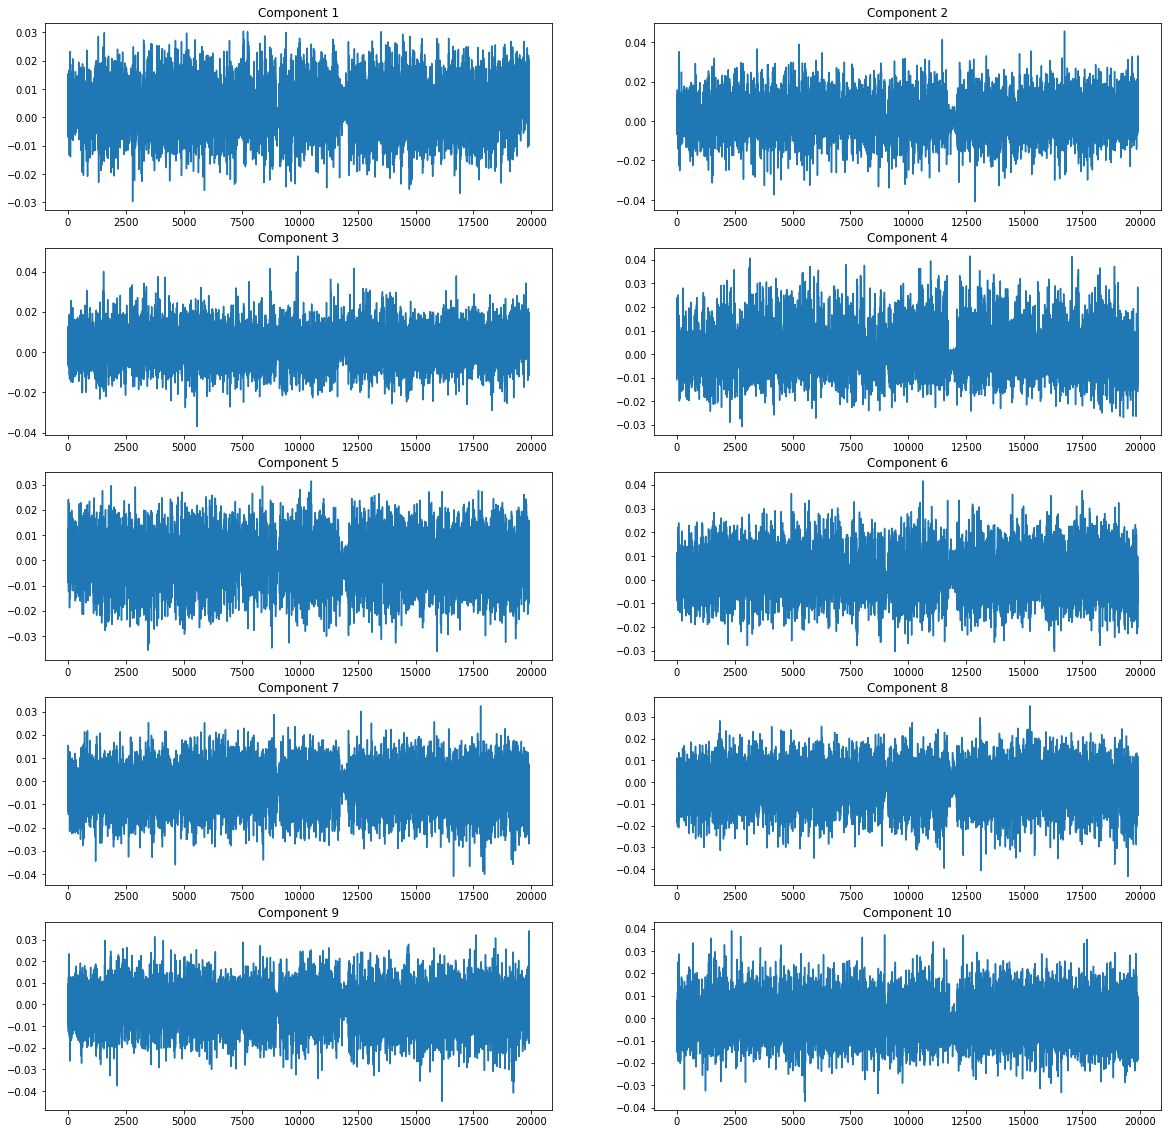

Component  1 :  [13522  7750  7572]
Component  2 :  [12878 11463 16739]
Component  3 :  [ 8709 12339  9917]
Component  4 :  [ 3159 17057 12653]
Component  5 :  [ 8798  3447 15934]


In [6]:
# Plot the main values of the 5 first componenets
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.plot(pca.components_[i])
    plt.title('Component ' + str(i+1))
plt.show()
# Print the three biggest values of each component
for i in range(5):
    print("Component ", i+1, ": ", np.argsort(np.abs(pca.components_[i]))[-3:])



In [15]:
pca_data = pca.transform(data_train_proc)
pca_data.shape

(742, 742)

In [17]:
# linear regression
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a linear regression model
model = LinearRegression()
# Fit the model

# split train test data
from sklearn.model_selection import train_test_split
data_train, data_test, data_train_targets, data_test_targets = train_test_split(pca_data, data_train_targets_proc, test_size=0.2, random_state=42)

model.fit(data_train, data_train_targets)
# Predict the target values
predictions = model.predict(data_test)
# Compute the Spearman correlation
spearman_corr, _ = spearmanr(predictions, data_test_targets)
# Compute the mean squared error
mse = mean_squared_error(predictions, data_test_targets)
print("Spearman correlation: ", spearman_corr)
print("Mean squared error: ", mse)



Spearman correlation:  0.39548194765293576
Mean squared error:  0.0068320121022342
